# Confidence interval of a mean

## Introduction

In biostatistics, we often estimate characteristics of a larger population from a smaller sample. But how confident are we in those estimates? This chapter introduces the concept of **confidence intervals** — a powerful tool that tells us how reliable our estimates are likely to be.

Confidence intervals are like a range of plausible values, instead of just a single number. We'll learn how to calculate and interpret these intervals for the most important statistic in biostatistics: the mean.

By the end of this chapter, we'll understand how confidence intervals work, how to use them to make stronger conclusions about our data, and how to avoid common misunderstandings. Whether we're new to statistics or just looking for a refresher, this chapter will give us the _confidence_ we need to tackle this essential concept.

## The t-distribution

To determine the width of the confidence interval of a mean, we utilize a constant called the **critical value** from the **t-distribution**, or the **critical t-value** also denoted as t*. The t-distribution is similar to the standard normal distribution but is used when the population standard deviation is unknown and estimated from the sample. The choice of $t^*$ depends on the desired **confidence level** and the **degrees of freedom (DF)**. In general, DF equals the number of data points minus the number of parameters being estimated, e.g., $\text{DF} = n - 1$ for the mean.

### Origin of the t-distribution

The t-distribution (or **Student distribution**) was developed by William Sealy Gosset, a chemist working for the Guinness brewery in the early 20th century. He published his work under the pseudonym "Student" due to company restrictions. The distribution arose from Gosset's need to make inferences about the mean of a normally distributed population when the sample size was small and the population standard deviation was unknown. The t-distribution is similar to the standard normal distribution (z-distribution) but has heavier tails, especially with smaller sample sizes. As the sample size increases, the t-distribution approaches the z-distribution.

### Using SciPy to obtain critical t-values

The [`scipy.stats` module](https://docs.scipy.org/doc/scipy/reference/stats.html) in Python provides a convenient way to work with the t-distribution and obtain critical t-values. For a _two-tailed confidence interval_, the expression $1 - \alpha/2$ is used to find $t^\ast$, with $\alpha$ the _signifcance level_, also called the _complement of the confidence level_.

In [27]:
from scipy.stats import t

# Define the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate alpha (for two-tailed test)
α = 1 - confidence_level

# Define the degrees of freedom (e.g., sample size - 1)
DF = 27

# Calculate the critical t-value (two-tailed)
#t_critical = t.ppf(1 - alpha/2, df)  # ppf is the percent point function (inverse of CDF)
t_critical = t(df=DF).ppf(q=1 - α/2)  # ppf is the percent point function (inverse of CDF)

print(f"The two-tailed critical t-value (t*) for a {100*confidence_level}% CI \
with {DF} degrees of freedom is {t_critical:.4f}")

The two-tailed critical t-value (t*) for a 95.0% CI with 27 degrees of freedom is 2.0518


> In Microsoft Excel, we can use `T.INV.2T(1-0.95, 27)`.

To access a wider range of t-values for various confidence levels and degrees of freedom, we can generate the following table.

In [28]:
import pandas as pd

# Confidence levels
confidence_levels = [0.80, 0.90, 0.95, 0.975, 0.99] # conf_lev = 1 - alpha

# Degrees of freedom
DF_values = list(range(1, 6)) + [10] + list(range(50, 201, 50))

# Create an empty dictionary to store t-values
data = {}

# Calculate t-values and populate dictionary
for df in DF_values:
    t_values = [t.ppf((1 + conf_level) / 2, df) for conf_level in confidence_levels]
    data[df] = t_values

# Create a DataFrame from the dictionary
df = pd.DataFrame(data, index=confidence_levels)

# Format the table
df.index.name = '1-α'
df.columns.name = 'DF'

# Print the table
print("Two-tailed critical values of the t-distribution for various DF (columns) and alpha (rows)")
print("==========================================================================================")
print(df.round(3).to_markdown(numalign='left', stralign='left'))

Two-tailed critical values of the t-distribution for various DF (columns) and alpha (rows)
| 1-α   | 1      | 2     | 3     | 4     | 5     | 10    | 50    | 100   | 150   | 200   |
|:------|:-------|:------|:------|:------|:------|:------|:------|:------|:------|:------|
| 0.8   | 3.078  | 1.886 | 1.638 | 1.533 | 1.476 | 1.372 | 1.299 | 1.29  | 1.287 | 1.286 |
| 0.9   | 6.314  | 2.92  | 2.353 | 2.132 | 2.015 | 1.812 | 1.676 | 1.66  | 1.655 | 1.653 |
| 0.95  | 12.706 | 4.303 | 3.182 | 2.776 | 2.571 | 2.228 | 2.009 | 1.984 | 1.976 | 1.972 |
| 0.975 | 25.452 | 6.205 | 4.177 | 3.495 | 3.163 | 2.634 | 2.311 | 2.276 | 2.264 | 2.258 |
| 0.99  | 63.657 | 9.925 | 5.841 | 4.604 | 4.032 | 3.169 | 2.678 | 2.626 | 2.609 | 2.601 |


### Sign of the critical t-value

The t-distribution is symmetrical around zero, meaning that the probability density is the same for positive and negative t-values with the same absolute value.

In a _one-tailed_ test, we're interested in whether the population mean is significantly greater than or less than a specific value.

- Left-tailed test: t* will be negative because we're looking for evidence in the left tail of the distribution.
- Right-tailed test: t* will be positive because we're looking for evidence in the right tail of the distribution.

In a _two-tailed_ test or when calculating a confidence interval, we consider both tails of the distribution.

- We'll typically get two critical t-values: one positive and one negative, corresponding to the upper and lower bounds of the confidence interval or the rejection regions in a two-tailed test.

In [29]:
# Parameters
DF = 11  # Degrees of freedom (n - 1)

# Calculate critical t-values
α = .05

# note that 0.975 - 0.025 = 0.95
t_critical_lower = t.ppf(α/2, DF)  # Lower critical value at q = 0.025
t_critical_upper = t.ppf(1-α/2, DF)  # Upper critical value at q = 0.975
print(f"For a {100*(1-α)}% confidence interval with {DF} degrees of freedom:")
print(f"Lower t* = {t_critical_lower:.1f} \
({100*(1-confidence_level)/2:.1f}% of the area under the curve is to the left of this value)")
print(f"Upper t* = {t_critical_upper:.1f} \
({100*(1-confidence_level)/2:.1f}% of the area under the curve is to the right of this value)")

For a 95.0% confidence interval with 11 degrees of freedom:
Lower t* = -2.2 (2.5% of the area under the curve is to the left of this value)
Upper t* = 2.2 (2.5% of the area under the curve is to the right of this value)


### Visualizing the t-distribution

To gain a deeper understanding of this distribution, let's visualize its shape and key properties.

The plot generated below depicts the **probability density function (PDF)** of the t-distribution for a specific DF value. This curve represents the likelihood of different t-values occurring under this distribution.

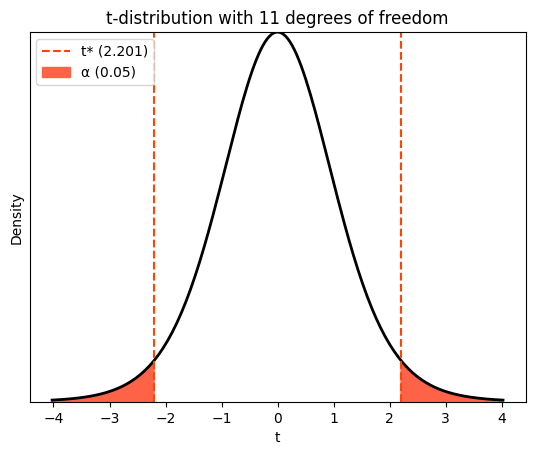

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
DF = 11  # Degrees of freedom (n - 1)
α = .05

# Calculate critical t-values 
t_critical_lower = t.ppf(α/2, DF)  # Lower critical value at q = 0.025
t_critical_upper = t.ppf(1-α/2, DF)  # Upper critical value at q = 0.975

# Generate x values for the plot
# x = np.linspace(-4, 4, 100)  # Range from -4 to 4 standard deviations
x=np.linspace(
    t(df=DF).ppf(q=.001), # Percent Point Function
    t(df=DF).ppf(q=.999),
    num=200)

# Calculate t-distribution PDF values
hx = t.pdf(x, DF)

# Create the plot
# plt.figure(figsize=(4, 3))
plt.plot(x, hx, 'k', lw=2)

# Plot the critical t-values
plt.axvline(
    x=t_critical_lower, # type: ignore
    color='orangered',
    linestyle='--')

plt.axvline(
    x=t_critical_upper, # type: ignore
    color='orangered',
    linestyle='--',
    label=f"t* ({t_critical_upper:.3f})")

# Shade confidence interval areas
# plt.fill_between(x, y, where=((x < -t_critical) | (x > t_critical)), color='mediumorchid',)
plt.fill_between(
    x, hx,
    where=((x <= t_critical_lower) | (x >= t_critical_upper)),
    color='tomato',
    label=f'α ({α})')

# Add labels and title
plt.xlabel('t')
plt.ylabel('Density')
plt.margins(x=0.05, y=0)
plt.yticks([])
plt.title(f"t-distribution with {DF} degrees of freedom")
plt.legend(loc=2);

The shaded areas in the plot highlight the regions outside the _95% confidence interval_. The non-shaded area in the middle represents the interval itself. This means that if we were to repeatedly sample from the population and calculate confidence intervals using the t-distribution, 95% of those intervals would contain the true population mean. The critical t-values that define the boundaries of this interval, where 2.5%  probability lies in each shaded tail, are calculated using the `t.ppf` function, as discussed in the previous chapters.

Let's now plot multiple t-distributions with varying degrees of freedom on the same graph, to illustrate how the shape changes as the sample size increases.

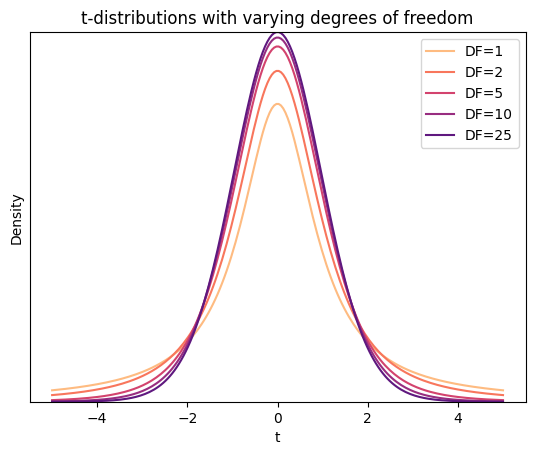

In [31]:
import seaborn as sns
sns.set_palette("magma_r")

# Degrees of freedom
DF_values = [1, 2, 5, 10, 25]

# Generate x values for the plot
x = np.linspace(-5, 5, 200)

# Create the plot
# plt.figure(figsize=(5, 4))
for df in DF_values:
    # Calculate t-distribution PDF values
    y = t.pdf(x, df)

    # Plot the t-distribution
    plt.plot(x, y, label=f'DF={df}')

# Add labels and title
plt.xlabel('t')
plt.ylabel('Density')
plt.margins(x=0.05, y=0)
plt.yticks([])
plt.title('t-distributions with varying degrees of freedom')
plt.legend();

The plot illustrates the following key characteristics of t-distributions:

- Bell-shaped: similar to the standard normal distribution, the t-distribution is symmetrical and bell-shaped.
- Heavier tails: the tails of the t-distribution are thicker than those of the standard normal distribution, especially for smaller degrees of freedom. This reflects the increased uncertainty associated with smaller sample sizes. This indicates a higher probability of obtaining extreme values (far from the mean) when the sample size is small.
- Approaches normal distribution: as the degrees of freedom increase (i.e., with larger sample sizes), the t-distribution approaches the standard normal distribution.

### Approaching the standard normal

As the degrees of freedom increase, the t-distribution becomes more and more similar to the standard normal distribution or *z-distribution*. This is evident in the plot, where the curve for *DF=25* closely resembles the standard normal curve.

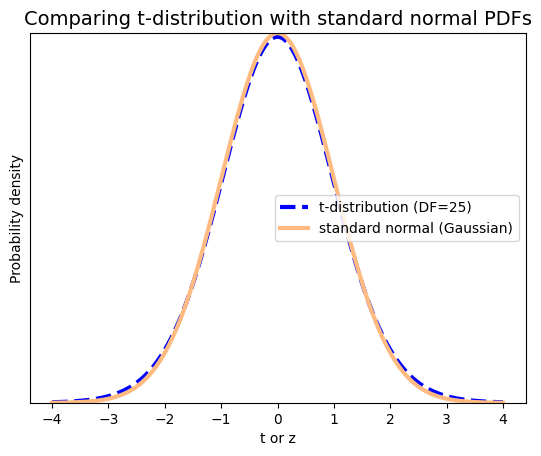

In [32]:
from scipy.stats import norm

# Set up parameters
DF = 25  # Degrees of freedom for t-distribution
x = np.linspace(-4, 4, 400)  # Range of x values

# Calculate PDF values
t_pdf = t.pdf(x, DF)
norm_pdf = norm.pdf(x)

# Plot
plt.plot(x, t_pdf, lw=3, ls='--', color='blue', label=f"t-distribution (DF={DF})")
plt.plot(x, norm_pdf, lw=3, label='standard normal (Gaussian)')
plt.title(
    'Comparing t-distribution with standard normal PDFs',
    fontsize=14)
plt.xlabel('t or z')
plt.ylabel('Probability density')
plt.margins(x=0.05, y=0)
plt.yticks([])
plt.legend();

This convergence is a consequence of the **central limit theorem (CLT)**, which states that the distribution of sample means approaches a normal distribution as the sample size increases, regardless of the shape of the original population distribution. Since degrees of freedom are directly related to sample size (*DF=n-1*), as DF increases, the sample size also increases, and the t-distribution becomes increasingly similar to the standard normal distribution.

In principle, when the sample size is large (typically *n>30*), the t-distribution and the standard normal distribution are very close. In this case, we can use either the **z-score** or the **t-value** for the CI calculations, and the results will be virtually identical.

## Calculating the confidence interval of a mean

The most common method of computing the confidence interval (CI) of a mean assumes that the data are sampled from a population that follows a _normal distribution_. The CI is centered around the sample mean $m$. To calculate its width, we need to consider the standard deviation $s$, the number of values in the sample $n$, and the desired degree of confidence (typically 95%).

### The t-statistic

While we can use the t-distribution to calculate confidence intervals and test hypotheses about the population mean, it's important to distinguish between the _t-statistic_ (calculated from the sample data) and $t^\ast$ (obtained from the t-distribution as shown above).

Suppose we have a population that is normally distributed, with known parameters μ (mean) and σ (standard deviation). By taking multiple random samples of size $n$ from this population, we can compute the sample mean $m$ and sample standard deviation $s$ for each. Then, for each sample, we can calculate the **t-statistic** $t$:

$$t=\frac{m - \mu}{s / \sqrt{n}}$$

- The t-statistic tells us how extreme the sample mean is compared to the hypothesized population mean, under the assumption that the null hypothesis is true (i.e., the true population mean is equal to the hypothesized value).
- A larger absolute value of t indicates a more significant difference between the sample mean and the hypothesized population mean.
- The sign of t indicates whether the sample mean is larger (+) or smaller (-) than the hypothesized population mean.

For example, suppose we want to test whether a new drug has an effect on blood pressure. We collect a sample of 30 patients and measure their blood pressure after taking the drug. The sample mean (m) is 120 mmHg, and the sample standard deviation (s) is 15 mmHg. Our hypothesize that the population mean blood pressure with the drug (μ) is 130 mmHg.

In [33]:
t_stat = (120 - 130) / (15 / np.sqrt(30))
print(f"The t-statistic (t) in this sample = {t_stat:.3f}")

The t-statistic (t) in this sample = -3.651


The result indicates that the sample mean is 3.651 standard errors _lower_ than the hypothesized population mean of 130 mmHg.

Once we've calculated the t-statistic, we can use the t-distribution to determine:

- P value: the probability of observing a t-statistic as extreme as or more extreme than the one calculated, assuming the null hypothesis is true. A smaller P value provides stronger evidence against the null hypothesis.
- Critical t-value t*: the t-value that corresponds to our chosen significance level (alpha) and degrees of freedom. If our calculated t-statistic is more extreme than t*, we reject the null hypothesis.

### The flip

For any individual sample, we know the specific values for the sample mean, standard deviation, and size. The population mean, though, remains hidden. Our goal is to _estimate this population mean_ while quantifying our level of uncertainty. To achieve this, we can calculate a confidence interval as follows:

$$\mu = m \pm t^\ast \times \frac{s}{\sqrt{n}}$$

To estimate the population mean with a specified level of confidence, we can employ the t-distribution and follow this procedure:

1. Calculate the sample mean ($m$) and sample standard deviation ($s$)
2. Determine the degrees of freedom as $\text{DF} = n - 1$
3. Choose a confidence level, e.g., 95%
4. Find the critical t-value $t^\ast$
5. Calculate the margin of error $W$, such as $W = t^\ast \times s / \sqrt{n}$
6. Construct the confidence interval $\text{CI}$, such as $\text{CI} = m \pm W$

### Example of body temperatures

To illustrate the effect of sample size on the confidence interval, we will simulate two datasets of body temperatures with the same population mean and SD, but with different sample sizes (n=12 and n=130). We will assume the body temperatures are _normally distributed_ with a population mean of 36.8 and a standard deviation of 0.4. We will then calculate and visualize the 95% confidence intervals for each sample using the _critical z-values_ (z*), supposing we know the population standard deviation. The difference between t* and z* values will be discussed just after that, for now we focus on the confidence intervals.

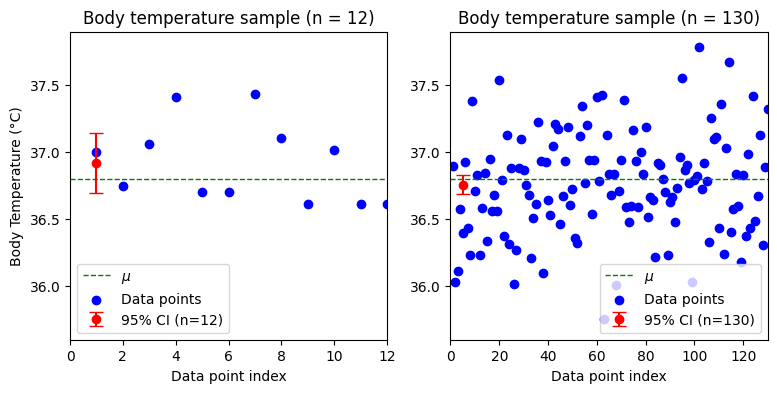

In [34]:
# Set random seed for reproducibility
np.random.seed(42)

# Population parameters
pop_mean = 36.8
pop_sd = 0.4

# Sample sizes
n1 = 12
n2 = 130

# Generate samples
sample1 = np.random.normal(pop_mean, pop_sd, n1)
sample2 = np.random.normal(pop_mean, pop_sd, n2)

# Calculate sample means and standard errors
sample_mean1 = np.mean(sample1)
sample_mean2 = np.mean(sample2)
sem1 = pop_sd / np.sqrt(n1)
sem2 = pop_sd / np.sqrt(n2)

# Calculate z-critical value for 95% CI (since pop std is known)
z_crit = norm.ppf(0.975)  # ppf gives us z score for 97.5%

# Calculate margin of error
margin_error1 = z_crit * sem1
margin_error2 = z_crit * sem2

# Calculate confidence intervals
ci_lower1 = sample_mean1 - margin_error1
ci_upper1 = sample_mean1 + margin_error1
ci_lower2 = sample_mean2 - margin_error2
ci_upper2 = sample_mean2 + margin_error2

# Create point plots with confidence intervals
plt.figure(figsize=(9, 4))
plt.subplot(121)  # 1 row, 2 columns, subplot 1
plt.errorbar(
    [1], [sample_mean1],
    yerr=margin_error1,
    fmt='ro', capsize=5,
    label=f'95% CI (n={n1})')
plt.axhline(
    pop_mean,
    color='g', linestyle='dashed', linewidth=1,
    label=r'$\mu$')
plt.scatter(
    range(1, n1 + 1), sample1,
    color='b',
    label='Data points')
plt.xlabel('Data point index')
plt.xlim(0,12)
plt.ylabel('Body Temperature (°C)')
plt.ylim(35.6, 37.9)
plt.title(f'Body temperature sample (n = {n1})')
plt.legend()

plt.subplot(122)  # 1 row, 2 columns, subplot 2
plt.errorbar(
    [5], [sample_mean2],
    yerr=margin_error2,
    fmt='ro', capsize=5,
    label=f'95% CI (n={n2})')
plt.axhline(
    pop_mean,
    color='g', linestyle='dashed', linewidth=1,
    label=r'$\mu$')
plt.scatter(
    range(1, n2 + 1), sample2,
    color='b',
    label='Data points')
plt.xlabel('Data point index')
plt.xlim(0,130)
plt.title(f'Body temperature sample (n = {n2})')
plt.ylim(35.6, 37.9)
plt.legend();

In [35]:
# Print the results
print(f"z* = {z_crit:.6f}\n")
print(f"Sample size n = {n1}, with known population SD of {pop_sd}:")
print(f"  Sample mean = {sample_mean1:.4f}")
print(f"  SE = {sem1:.5f}")
print(f"  Margin of error: {margin_error1:.5f}")
print(f"  95% confidence interval: ({ci_lower1:.4f}, {ci_upper1:.4f})")

print(f"\nSample size n = {n2}, with known population SD of {pop_sd}:")
print(f"  Sample mean = {sample_mean2:.4f}")
print(f"  SE = {sem2:.5f}")
print(f"  Margin of error: {margin_error2:.5f}")
print(f"  95% confidence interval: ({ci_lower2:.4f}, {ci_upper2:.4f})")

z* = 1.959964

Sample size n = 12, with known population SD of 0.4:
  Sample mean = 36.9184
  SE = 0.11547
  Margin of error: 0.22632
  95% confidence interval: (36.6921, 37.1447)

Sample size n = 130, with known population SD of 0.4:
  Sample mean = 36.7576
  SE = 0.03508
  Margin of error: 0.06876
  95% confidence interval: (36.6888, 36.8264)


As the number of observations in a sample increases, the sample statistics tend to converge towards the actual population parameters. This means that the t-distribution, used when the population standard deviation is unknown, closely resembles the z-distribution (standard normal distribution) in larger samples. Therefore, for samples of 50 or more observations, the choice between using the t-distribution or z-distribution for calculating confidence intervals or P values becomes less critical, as the results will be practically identical. In some later models, we may see references to either t-statistics (t) or z-statistics (z), but remember that this distinction is mainly significant for smaller sample sizes.

### Critical values

We can use the z* instead of t* when calculating the margin of error in certain situations, but it's important to understand the conditions under which this is appropriate.

- When to use z:
  - The population standard deviation σ is known: if we have access to the true population standard deviation, we can directly use the z-distribution (standard normal distribution) to calculate the critical value.
  - The sample size is large (typically n > 30): the central limit theorem states that the distribution of sample means approaches a normal distribution as the sample size increases. For large samples, the t-distribution closely approximates the z-distribution, making the z-value a valid substitute.
- When to use t:
  - The population standard deviation is unknown: this is the most common scenario in _real-world_ applications. When we don't know the population standard deviation, we estimate it from the sample data (using the sample standard deviation s). The t-distribution accounts for the additional uncertainty introduced by this estimation.
  - The sample size is small (typically n < 30): with small sample sizes, the t-distribution has heavier tails than the z-distribution, reflecting the greater variability in sample means. Using the t-distribution provides a more accurate confidence interval in this case.

Using the z-value when the t-value is appropriate can lead to narrower confidence intervals that may not accurately capture the true population parameter. The t-distribution provides a more conservative estimate in these cases. But the distinction between the t-distribution and z-distribution becomes less critical as the sample size increases. For very large samples (n > 100), the difference is negligible, and either distribution can be used.

For example, suppose we have a sample of 12 measurements with a sample mean (m) of 36.9184 and a sample standard deviation (s) of 0.2977. We want a 95% confidence interval. If we know the population standard deviation (here σ=0.4), we can use the z-value (approximately 1.96 for a 95% CI) to calculate the margin of error, as we did just above. If we don't know the population standard deviation, we should use the t-value (approximately 2.201 for a 95% CI with 11 degrees of freedom) to calculate the margin of error, as demonstrated below.

In [36]:
# Population parameters (known)
pop_mean = 36.8
pop_sd = 0.4

# Sample sizes
n1 = 12
n2 = 130

# Generate samples (for demonstration purposes)
np.random.seed(42)  # for reproducibility
sample1 = np.random.normal(pop_mean, pop_sd, n1)
sample2 = np.random.normal(pop_mean, pop_sd, n2)

# Calculate sample means
sample_mean1 = np.mean(sample1)
sample_mean2 = np.mean(sample2)

# Confidence level
confidence_level = 0.95
α = 1 - confidence_level

# Calculate critical t-values
t_critical1 = t.ppf(1 - α/2, n1-1)
t_critical2 = t.ppf(1 - α/2, n2-1)

# Calculate sample standard deviations
sample_sd1 = np.std(sample1, ddof=1)
sample_sd2 = np.std(sample2, ddof=1)

# Calculate standard error of the mean
sem1 = sample_sd1 / np.sqrt(n1)
sem2 = sample_sd2 / np.sqrt(n2)

# Calculate margin of error
margin_error1 = t_critical1 * sem1
margin_error2 = t_critical2 * sem2

# Calculate confidence intervals
ci_lower1 = sample_mean1 - margin_error1
ci_upper1 = sample_mean1 + margin_error1
ci_lower2 = sample_mean2 - margin_error2
ci_upper2 = sample_mean2 + margin_error2


# Print the results
print(f"Sample size n = {n1}, with unknown population SD:")
print(f"  t* = {t_critical1:.6f}")
print(f"  Sample mean = {sample_mean1:.4f}")
print(f"  Sample SD = {sample_sd1:.4f}")
print(f"  Sample SE = {sem1:.5f}")
print(f"  Margin of error: {margin_error1:.5f}")
print(f"  95% confidence interval: ({ci_lower1:.4f}, {ci_upper1:.4f})")

print(f"\nSample size n = {n2}, with unknown population SD:")
print(f"  t* = {t_critical2:.6f}")
print(f"  Sample mean = {sample_mean2:.4f}")
print(f"  Sample SD = {sample_sd2:.4f}")
print(f"  Sample SE = {sem2:.5f}")
print(f"  Margin of error: {margin_error2:.5f}")
print(f"  95% confidence interval: ({ci_lower2:.4f}, {ci_upper2:.4f})")

Sample size n = 12, with unknown population SD:
  t* = 2.200985
  Sample mean = 36.9184
  Sample SD = 0.2977
  Sample SE = 0.08594
  Margin of error: 0.18915
  95% confidence interval: (36.7292, 37.1075)

Sample size n = 130, with unknown population SD:
  t* = 1.978524
  Sample mean = 36.7576
  Sample SD = 0.3822
  Sample SE = 0.03352
  Margin of error: 0.06633
  95% confidence interval: (36.6913, 36.8239)


### Python tools for confidence interval calculation

There are several ways to directly calculate CIs in Python using various packages.

#### Normal distribution

This frequentist method assumes that the data are sampled from a _normally distributed population_, and that the population standard deviation is known. This function calculates the confidence interval based on the **z-score** (standard normal distribution), which is appropriate under these frequentist assumptions. If we have a _large sample size (n > 30)_, the normal distribution is often sufficient.

In [37]:
# Calculate 95% confidence interval (assuming known population std_dev)
confidence_level = 0.95
sample_mean = np.mean(sample2)
# Here, we would typically use the population std_dev when it is known, 
# or an estimate (e.g., from previous studies)
sd2 = np.std(sample2, ddof=1)

ci1 = norm.interval(confidence_level, loc=sample_mean, scale=pop_sd)
ci2 = norm.interval(confidence_level, loc=sample_mean, scale=sd2)

print(f"95% confidence interval (known population SD): ({ci1[0]:.3f}, {ci1[1]:.3f})")
print(f"95% confidence interval (sample SD): ({ci2[0]:.3f}, {ci2[1]:.3f})")

95% confidence interval (known population SD): (35.974, 37.542)
95% confidence interval (sample SD): (36.008, 37.507)


#### The t-distribution

Other frequentist methods provide a convenient way to calculate the confidence interval for a mean using the t-distribution. For example, [`statsmodels.stats.weightstats.DescrStatsW.tconfint_mean`](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.tconfint_mean.html) takes the data as input and returns the confidence interval directly. If we have a _small sample size_ and don't know the population standard deviation, the t-distribution is generally the most appropriate choice.

In [38]:
import statsmodels.api as sm

# Calculate 95% confidence interval
ci = sm.stats.DescrStatsW(sample1).tconfint_mean(alpha=α) 

print(f"95% CI using DescrStatsW (t-distribution, estimated SD): \
({ci[0]:.3f}, {ci[1]:.3f})")

95% CI using DescrStatsW (t-distribution, estimated SD): (36.729, 37.108)


This method is based on the confidence interval with equal areas around the median from the t-distribution, as calculated with [`scipy.stats.t.interval`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html).

In [39]:
sem = np.std(sample1, ddof=1) / np.sqrt(len(sample1))
ci = t.interval(
    confidence=1-α,
    df=len(sample1) - 1,
    loc=np.mean(sample1),
    scale=sem) # here scale is SE, no SD as in normal distribution

print(f"95% CI using `t.interval` (t-distribution, estimated SD): \
({ci[0]:.3f}, {ci[1]:.3f})")

95% CI using `t.interval` (t-distribution, estimated SD): (36.729, 37.108)


#### Bayesian approach

Bayesian methods allow us to incorporate _prior beliefs or information_ about the parameters we're estimating. This can be particularly useful when we have some knowledge about the data generating process or when we have limited data. They produce credible intervals, which are a more intuitive and direct interpretation of uncertainty compared to frequentist confidence intervals. A 95% credible interval means there's a **95% probability** the true parameter lies within that interval, given the data and the prior. Bayesian methods are less sensitive to small sample sizes than frequentist methods, which often rely on asymptotic assumptions that _may not hold for small datasets_. Bayesian statistics is a vast and complex field with [dedicated Python libraries like PyMC3 and Stan](https://allendowney.github.io/ThinkBayes2/preface.html).

The [`scipy.stats.bayes_mvs` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html) simplifies the calculation of **Bayesian credible intervals** for the mean, variance, and standard deviation. It uses [Jeffrey's prior, a non-informative prior](https://scholarsarchive.byu.edu/cgi/viewcontent.cgi?article=1277&context=facpub) that doesn't introduce strong assumptions about the parameter values. This can be a good starting point for Bayesian analysis when you have limited prior knowledge.

Note that for samples of size _smaller than 1000_, the function resorts to a _frequentist approach_. It calculates the sample mean and standard deviation, and then uses the **t-distribution** with n-1 degrees of freedom to determine the confidence interval.

In [40]:
from scipy.stats import bayes_mvs

# Calculate 95% Bayesian confidence interval for the mean
result = bayes_mvs(sample1, alpha=0.95)
ci_lower, ci_upper = result[0][1]  # Extract lower and upper bounds from the result object

print(f"Bayesian 95% CI in the dataset with n={n1}: ({ci_lower:.3f}, {ci_upper:.3f})")

Bayesian 95% CI in the dataset with n=12: (36.729, 37.108)


In [41]:
# Calculate 95% Bayesian confidence interval for the mean
result = bayes_mvs(sample2, alpha=0.95)
ci_lower, ci_upper = result[0][1]  # Extract lower and upper bounds from the result object

print(f"Bayesian 95% CI in the dataset with n={n2}: ({ci_lower:.3f}, {ci_upper:.3f})")

Bayesian 95% CI in the dataset with n=130: (36.691, 36.824)


### Bootstrapping

So far, we've explored traditional methods for calculating confidence intervals of the mean, relying on assumptions about the underlying population distribution. Now, we'll introduce **bootstrapping**, a powerful *non-parametric approach* that allows us to estimate confidence intervals directly from the data itself, without these assumptions. This technique offers a flexible and robust alternative, particularly when dealing with small sample sizes or non-normal data

#### Resampling

The **resampling** method works as follows:

- Create **pseudosamples**: draw *B*-times random samples (with replacement) from the original dataset, *each with the same size as the original dataset*.
- Calculate the statistic of interest: for each pseudosample, compute the mean (or any other parameter we're interested in). This gives a large collection of estimates based on the original data.
- Identify the percentiles: determine the 2.5th and 97.5th **percentiles** of this collection of estimates. This range, which contains 95% of the resampled means, serves as the 95% confidence interval (CI) for the population mean.

Remarkably, this resampling-based CI often aligns closely with the CI calculated using the conventional method that assumes a normal distribution. Extensive theoretical and simulation studies have validated this approach, leading some statisticians to advocate for its wider adoption.

The underlying principle behind resampling's effectiveness is the central limit theorem. This theorem states that as we take more and more simple random samples from a population, the distribution of the sample means will approximate a normal distribution, regardless of the original population's distribution. In other words, the average of the sample means will converge towards the true population mean as the number of samples increases. Learn more on bootstrap and computer-intensive methods in [Wilcox (2010)](https://link.springer.com/chapter/10.1007/978-1-4419-5525-8_6) and [Manly and Navarro Alberto (2020)](https://doi.org/10.1201/9780429329203).

In [42]:
# Set random seed for reproducibility
np.random.seed(111)

B = 10000  # Number of replicates

# !Make sure to choose exactly N elements randomly **with replacement**
# from the original N-data point set, e.g., size=12 for sample1 set
bs_replicates = np.array([
    np.mean(
        np.random.choice(
            sample1,
            size=len(sample1),
            replace=True
        )) for _ in range(B)
    ])

print(bs_replicates[:10])  # print the 10 first replicates

[37.0219151  36.88659802 37.00984188 36.7711161  36.83294499 36.9323412
 36.79624235 36.984121   36.88825192 36.918909  ]


#### Estimate of the CI

Once we have the bootstrap distribution of correlation coefficients, we can estimate the confidence interval by finding the percentiles corresponding to the desired confidence level. For a 95% confidence interval, we typically use the 2.5th and 97.5th percentiles of the bootstrap distribution. This means that 95% of the bootstrapped correlation coefficients fall within this interval, providing a range of plausible values for the true population correlation coefficient.

In [43]:
# Calculate the 95% confidence interval using np.percentile
bs_ci = np.round(np.percentile(bs_replicates, [2.5, 97.5]), 3)

# Print the results
print(f"Bootstrap 95% CI estimate = {bs_ci}")

Bootstrap 95% CI estimate = [36.769 37.088]


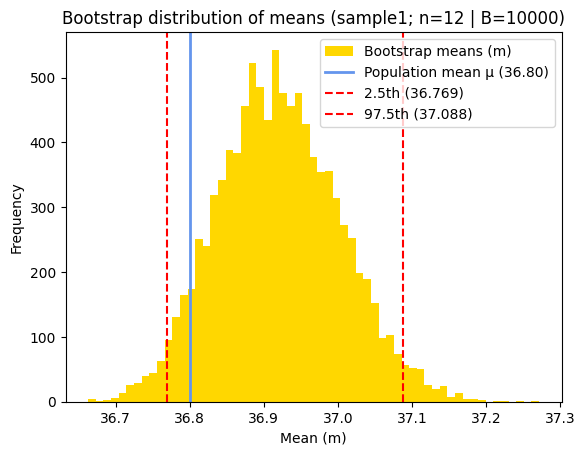

In [44]:
# Plot the histogram of the bootstrap distribution of correlation coefficients
plt.hist(
    bs_replicates,
    density=False,
    bins='auto',
    color='gold',
    label='Bootstrap means (m)')

# Annotate the observed mean difference
plt.axvline(
    x=pop_mean,  # type: ignore
    color='cornflowerblue',
    linestyle='-', lw=2,
    label=f'Population mean μ ({pop_mean:.2f})')

# Add lines for the confidence interval
plt.axvline(
    x=bs_ci[0],
    color='red',
    linestyle='--',
    label=f'2.5th ({bs_ci[0]:.3f})')
plt.axvline(
    x=bs_ci[1],
    color='red',
    linestyle='--',
    label=f'97.5th ({bs_ci[1]:.3f})')

# Add labels and title
plt.xlabel('Mean (m)')
plt.ylabel('Frequency')
plt.title(f"Bootstrap distribution of means (sample1; n={len(sample1)} | B={B})")
plt.legend();

#### Bootstrap with Pingouin

The [`pingouin.compute_bootci`](https://pingouin-stats.org/build/html/generated/pingouin.compute_bootci.html) function calculates bootstrapped confidence intervals of univariate and bivariate functions, using the SciPy's built-in bootstrap function [`scipy.stats.bootstrap`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html#scipy.stats.bootstrap).

In [45]:
import pingouin as pg

# Calculate 95% percentile bootstrap CI
print(
    f"95% bootstrap CI of sample1 (Pingouin):",
    pg.compute_bootci(
        sample1,
        func='mean',
        confidence=0.95,
        method='per',
        seed=111,
        decimals=3,
        n_boot=10000)
)

95% bootstrap CI of sample1 (Pingouin): [36.765 37.084]


This function also returns the bootstrapped distribution. Let's examine the differences between these distributions for samples with n=12 and n=130.

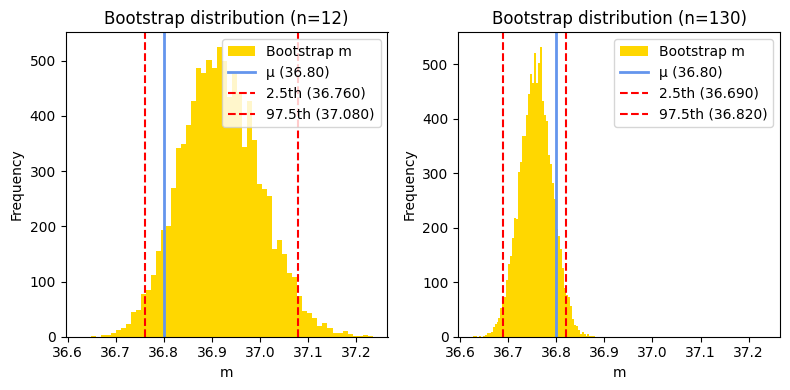

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharex=True)

for i, sample in enumerate([sample1, sample2]):
    # Calculate 95% percentile bootstrap CI
    ci, bs = pg.compute_bootci(
        sample,
        func='mean',
        method='per',
        seed=111,
        n_boot=10000,
        return_dist=True,  # Also returns the bootstrapped distribution for plotting
    )
    
    # Plot the histogram of the bootstrap distribution of the means
    ax[i].hist(
        bs,
        density=False,
        bins='auto',
        color='gold',
        label='Bootstrap m')

    # Annotate the true population mean
    ax[i].axvline(
        x=pop_mean,  # type: ignore
        color='cornflowerblue',
        linestyle='-', lw=2,
        label=f'μ ({pop_mean:.2f})')

    # Add lines for the confidence interval
    ax[i].axvline(
        x=ci[0],
        color='red',
        linestyle='--',
        label=f'2.5th ({ci[0]:.3f})')
    ax[i].axvline(
        x=ci[1],
        color='red',
        linestyle='--',
        label=f'97.5th ({ci[1]:.3f})')

    # Add labels and title
    ax[i].set_xlabel('m')
    ax[i].set_ylabel('Frequency')
    ax[i].set_title(f"Bootstrap distribution (n={len(sample)})")
    ax[i].legend()
plt.tight_layout();

While the bootstrap method is distribution-free and can be particularly useful for non-normal data, its results can vary depending on the size of the dataset. For larger datasets, the bootstrap confidence interval might closely align with the results obtained from frequentist or Bayesian approaches. However, for smaller datasets, the bootstrap confidence interval might exhibit greater variability and potentially deviate from the results of other methods due to the inherent randomness in resampling.

## Standard error and confidence interval

As we saw in a previous figure and in a previous chapter, larger samples tend to yield more precise estimates of population statistics, reflected in their narrower distributions. The standard deviation of a statistic derived from a sample is called the standard error of that statistic. In the case of the sample mean, the [**standard error (SE)**](https://en.wikipedia.org/wiki/Standard_error), also known as the *standard error of the mean (SEM)* or the *standard deviation of the mean* ($\sigma_{\overline{x}}$) when the estimate is the mean, is given by:

$$\sigma_{\overline{x}} = \frac{\sigma}{\sqrt{n}} \approx \frac{s}{\sqrt{n}}$$

where $\sigma$ is the population standard deviation, $s$ the sample standard deviation, and $n$ is the sample size. It's important to remember that this calculation relies on the assumption that the sample standard deviation closely mirrors the population standard deviation, which is generally acceptable for samples of moderate or larger size. As the formula illustrates, the SE is inversely proportional to the square root of the sample size. This confirms our intuitive understanding that larger samples lead to more precise estimates of the population mean, as evidenced by the smaller SE.

We might also have noticed the term "standard error" or "standard error of the mean" appearing in previous calculations of the margin of error. Let's take a closer look at the relationship between the confidence interval (CI) and the SE, as they both play crucial roles in understanding the precision of our estimates.

A point estimate, such as the sample mean, gives us a single value to estimate a population parameter. However, estimates vary from sample to sample due to random sampling error. A confidence interval addresses this uncertainty by providing a range around the point estimate. This range is constructed to capture the true population parameter with a certain degree of confidence, often set at 95%. Wider intervals offer greater confidence in capturing the true parameter, but at the cost of reduced precision.

Recall that the SE is a measure of how much the sample mean is expected to vary from sample to sample, quantifying the variability we expect to see in sample means due to random sampling error. A smaller SE indicates that the sample mean is likely to be closer to the true population mean.

The margin of error in a confidence interval is directly related to the SE ($s_{\hat{\theta}}$) of the point estimate $\hat \theta$. It's calculated by multiplying the SE by a critical value $c^\ast$ (either from the t-distribution or the z-distribution) that corresponds to our desired confidence level:

$$W=c^\ast \times s_{\hat{\theta}}$$

The critical value depends on the chosen confidence level (e.g., 95% or 99%) and the degrees of freedom (if using the t-distribution).

Therefore, the confidence interval is essentially constructed by adding and subtracting the margin of error from the sample mean: $\text{CI} = m \pm W$.

In essence, the confidence interval uses the SE as a building block to create a range of plausible values for the population mean. The width of the confidence interval reflects the level of uncertainty in our estimate:

- Narrow CI: smaller SE, more precise estimate
- Wide CI: larger SE, less precise estimate

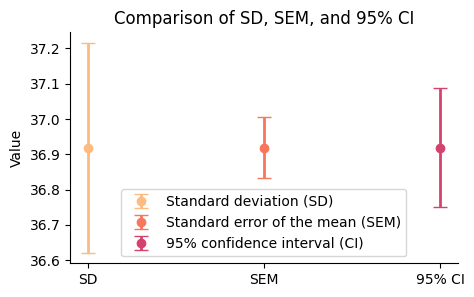

In [53]:
from scipy.stats import sem

# Calculate statistics
mean = np.mean(sample1)
sd = np.std(sample1, ddof=1)  # Unbiased sample standard deviation
sample_sem = sem(sample1)

# Critical value for 95% CI
z_crit = norm.ppf(0.975)  # Assuming normal distribution
W =  z_crit * sample_sem  # margin of error

# Calculate confidence interval
ci = (mean - W, mean + W)

# Plotting
plt.figure(figsize=(5,3))

# SD error bar
plt.errorbar(
    1, mean,
    yerr=sd,
    fmt='o', capsize=5, lw=2,
    label='Standard deviation (SD)')

# SE error bar
plt.errorbar(
    2, mean,
    yerr=sample_sem,
    fmt='o', capsize=5, lw=2,
    label='Standard error of the mean (SEM)')

# 95% CI error bar
plt.errorbar(
    3, mean,
    yerr=W,
    fmt='o', capsize=5, lw=2,
    label='95% confidence interval (CI)')

# Add labels and title
plt.xticks([1, 2, 3], ['SD', 'SEM', '95% CI'])
plt.ylabel('Value')
plt.title('Comparison of SD, SEM, and 95% CI')
plt.legend()
sns.despine();

- The error bar for SD is the longest, reflecting the variability of individual data points around the mean.
- The SEM error bar is shorter than the SD, showing the reduced variability expected in sample means compared to individual data points.
- The 95% CI error bar has a moderate width, indicating the range within which we are 95% confident that the true population mean lies.

## CI of the standard deviation

### Frequentist approach

Confidence intervals are a versatile tool in statistics, applicable to a wide range of values calculated from sample data, not just the mean. Under common assumptions, i.e., a roughly Gaussian population distribution, a random and representative sample, independent observations, accurate data, and a meaningful outcome, a 95% CI allows us to be 95% confident that the calculated interval captures the true population parameter of interest, whether it's the standard deviation, a proportion, or another statistic.

While the `scipy.stats` library doesn't directly provide a function for calculating confidence intervals of standard deviation using the frequentist approach, it's easy to implement it using the **chi-squared** distribution.

In [48]:
from scipy.stats import chi2

def std_dev_conf_interval(data, confidence=0.95):
    """
    Calculate the confidence interval for population standard deviation 
    using the frequentist approach.

    Args:
        data (array-like): The sample data.
        confidence (float): The desired confidence level (default: 0.95).

    Returns:
        tuple: The lower and upper bounds of the confidence interval.
    """
    n = len(data)

    # First calculate the unbiased (ddof=1) sample standard deviation
    sample_std_dev = np.std(data, ddof=1)
    # CI for the population SD is derived from the chi-squared distribution with DF=n-1
    # Find the critical chi-squared values with PPF
    chi2_lower = chi2.ppf(α / 2, df = n - 1)
    chi2_upper = chi2.ppf(1 - α / 2, df = n - 1)
    # Use sqrt((n - 1) * s**2 / crit_chi2)
    lower_bound = np.sqrt((n - 1) * sample_std_dev**2 / chi2_upper)
    upper_bound = np.sqrt((n - 1) * sample_std_dev**2 / chi2_lower)

    return sample_std_dev, lower_bound, upper_bound

In [49]:
for sample in [sample1, sample2]:
    n = len(sample)
    print(f"SD and 95% CI for sample with n={n} \
(chi²): \n\t {std_dev_conf_interval(sample)}")

SD and 95% CI for sample with n=12 (chi²): 
	 (0.2976964334156459, 0.21088670986063496, 0.5054522302512634)
SD and 95% CI for sample with n=130 (chi²): 
	 (0.38223178599879426, 0.34073809210625733, 0.4353236863653785)


### Bayesian approach

We can also use the `scipy.stats.bayes_mvs` function to calculate Bayesian credible intervals for the standard deviation. This approach incorporates prior knowledge (or lack thereof) about the population parameters, which can be particularly useful when dealing with limited data.

Note that for sample size smaller than 1000, the function uses a generalized gamma distributed with shape parameters $c=-2$ and $a=(n-1)/2$.

In [50]:
for sample in [sample1, sample2]:
    n = len(sample)

    # Calculate Bayesian credible interval for standard deviation (alpha = 0.95 for 95% CI)
    result = bayes_mvs(sample, alpha=0.95)

    print(f"SD and 95% CI for sample with n={n} \
(Bayes): \n\t{result[2]}")

SD and 95% CI for sample with n=12 (Bayes): 
	Std_dev(statistic=0.32011752574920377, minmax=(0.21088670986063499, 0.5054522302512634))
SD and 95% CI for sample with n=130 (Bayes): 
	Std_dev(statistic=0.3844721557624937, minmax=(0.34073809210625733, 0.4353236863653785))


Comparable values for the SD and 95% CI can be obtained from the ["Confidence interval of a SD" calculator from GraphPad](https://www.graphpad.com/quickcalcs/CISD2/):

|  n  |      SD      |     lower    |     upper    |
| --- | ------------ | ------------ | ------------ |
|  12 | 0.2976964334 | 0.2108869126 | 0.5054521106 |
| 130 | 0.3822317859 | 0.3407364138 | 0.4353220208 |


### Bootstrap approach

While bootstrapping is often used to estimate the confidence interval of a mean, it can also be applied to other statistics, such as the standard deviation. This is particularly useful when the underlying distribution of the data is unknown or non-normal, making it difficult to rely on traditional methods for calculating confidence intervals.

As before, we create multiple resamples (with replacement) from the original data. Each resample should be the same size as the original. But instead of calculating the mean of each bootstrap sample, we calculate the standard deviation. This collection of standard deviations from all the bootstrap samples forms the *bootstrap distribution of the standard deviation*. The percentiles corresponding to the desired confidence level (e.g., 2.5th and 97.5th for a 95% CI) from the bootstrap distribution give us the lower and upper bounds of the CI.

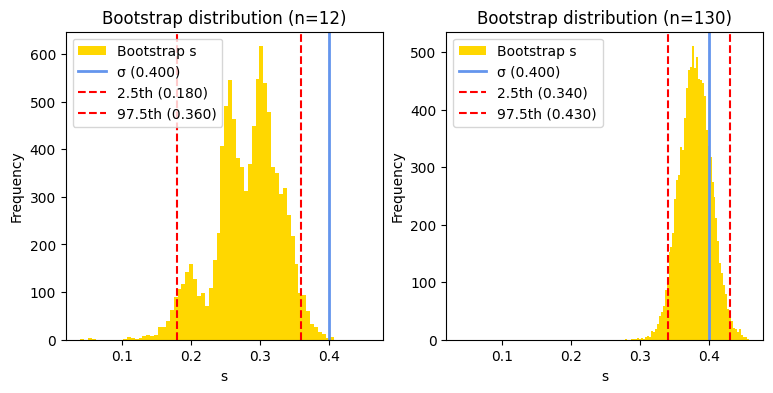

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(9,4), sharex=True)

for i, sample in enumerate([sample1, sample2]):
    # Calculate 95% percentile bootstrap CI
    ci, bs = pg.compute_bootci(
        sample,
        func='std',  # Standard deviation
        method='per',
        seed=111,
        n_boot=10000,
        return_dist=True,
    )
    
    # Plot the histogram of the bootstrap distribution of correlation coefficients
    ax[i].hist(
        bs,
        density=False,
        bins='auto',
        color='gold',
        label='Bootstrap s')

    # Annotate the population SD
    ax[i].axvline(
        x=pop_sd,  # type: ignore
        color='cornflowerblue',
        linestyle='-', lw=2,
        label=f'σ ({pop_sd:.3f})')

    # Add lines for the confidence interval
    ax[i].axvline(
        x=ci[0],
        color='red',
        linestyle='--',
        label=f'2.5th ({ci[0]:.3f})')
    ax[i].axvline(
        x=ci[1],
        color='red',
        linestyle='--',
        label=f'97.5th ({ci[1]:.3f})')

    # Add labels and title
    ax[i].set_xlabel('s')
    ax[i].set_ylabel('Frequency')
    ax[i].set_title(f"Bootstrap distribution (n={len(sample)})")
    ax[i].legend();

If the histogram of bootstrap replicates of the standard deviation appears multimodal (i.e., has multiple peaks), it suggests non-normality of the underlying population distribution from which the sample is drawn, sampling variability, especially if the sample size is small, and/or an actual underlying structure in the population. In the current example, we know that the original population is totally normal, therefore the sampling variability, with the small sample size, may affect the bootstrap process.

When faced with a _multimodal bootstrap distribution_ of standard deviations, the traditional methods of constructing confidence intervals (e.g., using percentiles or assuming normality) might not be appropriate. Alternative methods, e.g., bias-corrected and accelerated (BCa) bootstrap or the bootstrapped-t method, can be more suitable.

However, as we increase the sample size, the bootstrap distribution of the standard deviation tends to become more stable and unimodal, even if the original population distribution is not perfectly normal. This is because larger samples better represent the true population characteristics. Consequently, with a larger sample size, the true population standard deviation is more likely to be captured within the calculated bootstrap confidence interval, leading to more reliable inferences about the population variability.

## Conclusion

In this chapter, we've explored the fundamental concept of confidence intervals and their essential role in statistical inference. We've learned that confidence intervals provide a range of plausible values for population parameters, like the mean, and quantify the uncertainty associated with those estimates.

We delved into the different methods for calculating confidence intervals, including the t-distribution for smaller samples and the z-distribution for larger ones. We also explored the Bayesian approach, which incorporates prior information, and the non-parametric bootstrap method, which is particularly useful for complex or non-normal data.

We've seen how confidence intervals can be visualized using plots, helping us grasp the relationship between sample size, variability, and precision. We also examined the close connection between confidence intervals and the standard error of the mean, a key measure of the uncertainty in our sample mean estimate.

By mastering confidence intervals, we've gained a powerful tool for analyzing data and drawing meaningful conclusions in the field of biostatistics. But confidence intervals are not just about numbers; they are about understanding the uncertainty inherent in estimation and making informed decisions based on that understanding.

## Cheat sheet

This cheat sheet provides a quick reference for essential code snippets used in this chapter.

### t-distribution

```python
from scipy.stats import t

# Define the degrees of freedom (e.g., sample size - 1)
DF = 27

# Define the t-distribution
t_distribution = t(df=DF)

# Calculate mean, variance (and more), median and SD from the model
t_distribution.stats(moments='mv')
t_distribution.mean()
t_distribution.median()
t_distribution.std()
```

### PDF Plot

```python
import numpy as np
import matplotlib.pyplot as plt

plt.plot(
    # central 99.8% of the distribution
    x:=np.linspace(
        t_distribution.ppf(q=.001), # Percent Point Function
        t_distribution.ppf(q=.999),
        num=200),
    #x:=np.linspace(-4, 4, 100)  # Range from -4 to 4 standard deviations
    t_distribution.pdf(x),)
```

### Critical values

```python
# Defeine alpha (for two-tailed test)
α = 0.05

# Calculate critical bound t-values (direct method)
t_critical_lower = t.ppf(α/2, df=DF)  # Lower critical value at q = 0.025
t_critical_upper = t.ppf(1 - α/2), df=DF)  # Upper critical value at q = 0.975

# Calculate the critical z-value (two-tailed)
from scipy.stats import norm

z_critical = norm.ppf(q=(1 - α/2))
```

### Confidence interval

```python
# Population parameters
# pop_mean = 36.8  # mean
# pop_sd = 0.4     # standard deviation

# Generate toy sample derived from Normal distribution
# n = 12                     # sample size
sample = np.random.normal(
    loc=pop_mean,
    scale=pop_sd,
    size=n)
# sample_mean = 36.9184      # or use np.mean(sample)
# sample_sd = 0.2977         # or use np.std(sample, ddof=1)


### Manual calculation of the CI
# Calculate the critical t-value
t_critical = t(df=n-1).ppf(q=1-α/2) # Percent Point Function

# Calculate the standard error of the mean
sem = sample_sd / np.sqrt(n)  # or use scipy.stats.sem on data
#sem = pop_sd / np.sqrt(n)  # if population SD is known

# Calculate margin of error
margin_error = t_critical * sem
#margin_error = z_critical * sem  # large sample sizes and/or known population SD

# Calculate confidence intervals
(sample_mean - margin_error, sample_mean + margin_error)


### Computational calculation of the CI
# Frequentist - Small sample size and unknown population SD
import statsmodels.api as sm

sm.stats.DescrStatsW(sample).tconfint_mean(alpha=α)

# Equivalent to
t.interval(
    confidence=1-α,
    df=n-1,
    loc=sample_mean,
    scale=sem) # here scale is SE, no SD as in normal distribution


# Frequentist - Large sample size and/or known population SD
norm.interval(
    confidence=1-α,
    loc=sample_mean,
    scale=pop_sd) # or sample_sd


# Bayesian
from scipy.stats import bayes_mvs

# If n<1000, it uses the frequentist approach with the t-distribution
bayes_mvs(sample, alpha=0.95)[0][1]  # extract `minmax` tuple from `mean`
# bayes_mvs(sample, alpha=0.95) # returns mean, var and SD with 95% credible intervals
```

### Plot errorbar

```python
# 95% CI error bar
plt.errorbar(0, sample_mean, yerr=margin_error, fmt='o', capsize=4)
```

### Bootstrapping

```python
# Resampling and mean calculation (manual calculation)
B = 10000 # number of replicates

# !Make sure to choose exactly N elements randomly **with replacement**
# from the original N-data point set
bs_replicates = [
    np.random.choice(
        sample,
        size=len(sample),
        replace=True
    ).mean() for _ in range(B)]

# Calculate percentiles
np.percentile(bs_replicates, 2.5), np.percentile(bs_replicates, 97.5)

# Calculate percentile bootstrap and distribution with Pingouin
import pingouin as pg
ci_bs, bs_replicates = pg.compute_bootci(
    sample,
    func='mean',  # or 'std' for standard deviation, or any custom function
    method='per',
    return_dist=True)

# Plot the histogram
plt.hist(bs_replicates, density=False)
```

## Session information

The output below details all packages and version necessary to reproduce the results in this report.

In [52]:
!python --version
print("-------------")

from importlib.metadata import version

# List of packages we want to check the version
packages = ['numpy', 'pandas', 'scipy', 'pingouin', 'statsmodels', 'matplotlib', 'seaborn']

# Initialize an empty list to store the versions
versions = []

# Loop over the packages
for package in packages:
    try:
        # Get the version of the package
        package_version = version(package)
        # Append the version to the list
        versions.append(package_version)
    except Exception:  # Use a more general exception for broader compatibility
        versions.append('Not installed')

# Print the versions
for package, version in zip(packages, versions):
    print(f'{package}: {version}')

Python 3.12.7
-------------
numpy: 1.26.4
pandas: 2.2.2
scipy: 1.14.1
pingouin: 0.5.5
statsmodels: 0.14.2
matplotlib: 3.9.2
seaborn: 0.13.2
